<a href="https://colab.research.google.com/github/aymenbenammar/TP-RN-/blob/main/tpRN_AymenBenAmmar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#1- Créer Un DataFrame en utilisant les données de fichier ‘’Iris.csv” qui contient notre dataSet.
import pandas as pd
url='https://drive.google.com/file/d/1lCrldn-uT1K6ctUC2xt7-hMjbMZ9Ft9r/view?usp=sharing'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
df = pd.read_csv(url)

In [2]:
#2-Afficher les 10 premières lignes du DataFrame.
df.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [4]:
#3-Afficher les dimensions du dataframe.
df.shape

(150, 6)

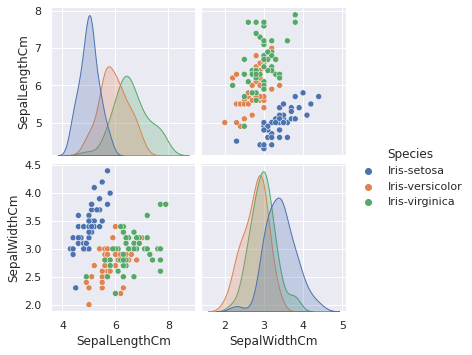

In [5]:
#4-Utiliser la bibliothèque python Seaborn pour visualiser les données en fonction de la longueur des pétales et de largeur des sépales.
# Import seaborn
import seaborn as sns
sns.set_theme()
sns.pairplot(
    data=df, vars=("SepalLengthCm","SepalWidthCm") , hue="Species"
)

In [11]:
#5-Ecrire un script python permettant de labelliser les différentes espèces d’iris.
for i in range(len(df.axes[0])):
  for j in range(len(df.axes[1])):
    if df.iloc[i,j]=="Iris-setosa":
      df.iloc[i,j]=0
    elif df.iloc[i,j]=="Iris-virginica":
      df.iloc[i,j]=1
    elif df.iloc[i,j]=="Iris-versicolor":
      df.iloc[i,j]=2

In [12]:
#6-Afficher du nouveau les 10 premières lignes du nouveau DataFrame contenant les labels.
df.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0
5,6,5.4,3.9,1.7,0.4,0
6,7,4.6,3.4,1.4,0.3,0
7,8,5.0,3.4,1.5,0.2,0
8,9,4.4,2.9,1.4,0.2,0
9,10,4.9,3.1,1.5,0.1,0


In [13]:
#7-Écrire un script python permettant la division de dataset en des données d’apprentissage (70%) et des données de test (30%).
from sklearn import model_selection 
x=df.values[:,0:4]
y=df.values[:,5]
xtrain,xtest,ytrain,ytest=model_selection.train_test_split(x,y,train_size=0.7)


In [14]:
#8-Afficher les 10 premières données d’apprentissage et celles de test.
xtrain[0:10]

array([[79, 6.0, 2.9, 4.5],
       [125, 6.7, 3.3, 5.7],
       [96, 5.7, 3.0, 4.2],
       [131, 7.4, 2.8, 6.1],
       [135, 6.1, 2.6, 5.6],
       [139, 6.0, 3.0, 4.8],
       [29, 5.2, 3.4, 1.4],
       [128, 6.1, 3.0, 4.9],
       [88, 6.3, 2.3, 4.4],
       [11, 5.4, 3.7, 1.5]], dtype=object)

In [15]:
xtest[0:10]

array([[26, 5.0, 3.0, 1.6],
       [69, 6.2, 2.2, 4.5],
       [4, 4.6, 3.1, 1.5],
       [110, 7.2, 3.6, 6.1],
       [70, 5.6, 2.5, 3.9],
       [124, 6.3, 2.7, 4.9],
       [30, 4.7, 3.2, 1.6],
       [28, 5.2, 3.5, 1.5],
       [56, 5.7, 2.8, 4.5],
       [83, 5.8, 2.7, 3.9]], dtype=object)

In [16]:
#9-Ecrire un script python qui utilise un perceptron multicouche pour l’apprentissage des données avec un optimisateur
%%time
from sklearn.neural_network import MLPClassifier 
rna= MLPClassifier(hidden_layer_sizes=(4,),solver="lbfgs",epsilon=0.07,max_iter=150,alpha=1e-5)
ytrain=ytrain.astype('int')
xtrain=xtrain.astype('int')

CPU times: user 163 µs, sys: 0 ns, total: 163 µs
Wall time: 169 µs


In [17]:
#Learn
rna.fit(xtrain,ytrain)

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPClassifier(alpha=1e-05, epsilon=0.07, hidden_layer_sizes=(4,), max_iter=150,
              solver='lbfgs')

In [18]:
#predict
prediction=rna.predict(xtest)
prediction

array([0, 2, 0, 1, 2, 1, 0, 0, 2, 2, 1, 0, 0, 2, 0, 2, 2, 2, 1, 2, 1, 0,
       2, 2, 2, 1, 2, 2, 2, 1, 0, 0, 1, 2, 2, 0, 0, 2, 0, 2, 0, 1, 1, 0,
       1])

In [19]:
ytest

array([0, 2, 0, 1, 2, 1, 0, 0, 2, 2, 1, 0, 0, 2, 0, 2, 2, 2, 1, 2, 1, 0,
       2, 2, 2, 1, 0, 2, 2, 1, 0, 0, 1, 2, 2, 0, 0, 2, 0, 2, 0, 1, 1, 0,
       1], dtype=object)

In [20]:
#10-Evaluer ce perceptron en affichant son “accuracy” et le temps de réponse.
from sklearn import metrics 
metrics.accuracy_score(list(ytest),prediction)

0.9777777777777777

In [21]:
#11-Afficher la matrice de confusion associée à notre cas.
metrics.confusion_matrix(list(ytest),prediction)

array([[15,  0,  1],
       [ 0, 11,  0],
       [ 0,  0, 18]])

In [22]:
#13-On va ajouter le paramètre de taux d’apprentissage au niveau de classifieur utilisé pour une valeur égale 0.7
%%time
import matplotlib.pyplot as plt
rna= MLPClassifier(hidden_layer_sizes=(4,),solver="sgd",epsilon=0.07,max_iter=150,learning_rate_init=0.7,learning_rate= "constant")
ytrain=ytrain.astype('int')
xtrain=xtrain.astype('int')
#Learn
rna.fit(xtrain,ytrain)


CPU times: user 14.7 ms, sys: 874 µs, total: 15.6 ms
Wall time: 20.1 ms


MLPClassifier(epsilon=0.07, hidden_layer_sizes=(4,), learning_rate_init=0.7,
              max_iter=150, solver='sgd')

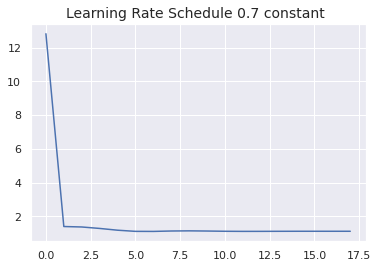

In [23]:
#affichage
plt.plot(rna.loss_curve_)
plt.title("Learning Rate Schedule 0.7 constant ",fontsize=14)
plt.show()

In [24]:
#14-Nous allons étudier la variation du paramètre de taux d’apprentissage
rna= MLPClassifier(hidden_layer_sizes=(4,),solver="sgd",epsilon=0.07,max_iter=150,learning_rate_init=0.2,learning_rate= "constant",)
ytrain=ytrain.astype('int')
xtrain=xtrain.astype('int')
#Learn
rna.fit(xtrain,ytrain)

MLPClassifier(epsilon=0.07, hidden_layer_sizes=(4,), learning_rate_init=0.2,
              max_iter=150, solver='sgd')

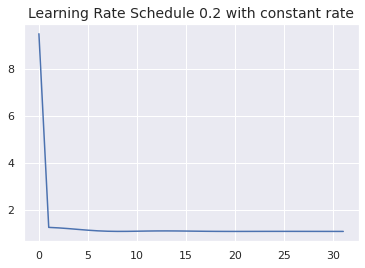

In [25]:
plt.plot(rna.loss_curve_)
plt.title("Learning Rate Schedule 0.2 with constant rate",fontsize=14)
plt.show()

In [26]:
%%time
rna1= MLPClassifier(hidden_layer_sizes=(4,),solver="sgd",epsilon=0.07,max_iter=150,learning_rate_init=0.2,learning_rate= "invscaling",)
ytrain=ytrain.astype('int')
xtrain=xtrain.astype('int')
#Learn
rna1.fit(xtrain,ytrain)

CPU times: user 14.9 ms, sys: 0 ns, total: 14.9 ms
Wall time: 42.9 ms


MLPClassifier(epsilon=0.07, hidden_layer_sizes=(4,), learning_rate='invscaling',
              learning_rate_init=0.2, max_iter=150, solver='sgd')

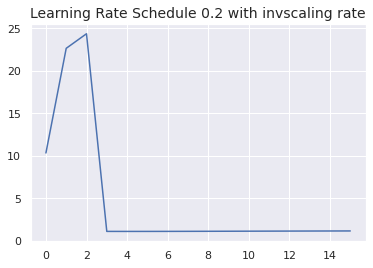

In [27]:
plt.plot(rna1.loss_curve_)
plt.title("Learning Rate Schedule 0.2 with invscaling rate",fontsize=14)
plt.show()

In [28]:
rna= MLPClassifier(hidden_layer_sizes=(4,),solver="sgd",epsilon=0.07,max_iter=150,learning_rate_init=0.7,learning_rate= "invscaling",)
ytrain=ytrain.astype('int')
xtrain=xtrain.astype('int')
#Learn
rna.fit(xtrain,ytrain)

MLPClassifier(epsilon=0.07, hidden_layer_sizes=(4,), learning_rate='invscaling',
              learning_rate_init=0.7, max_iter=150, solver='sgd')

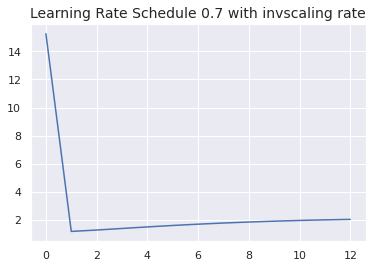

In [29]:
plt.plot(rna.loss_curve_)
plt.title("Learning Rate Schedule 0.7 with invscaling rate",fontsize=14)
plt.show()

In [30]:
#15-Nous allons fixer un nombre d’itération égale à 10 fois le nombre fixé au début.
%%time
rna1= MLPClassifier(hidden_layer_sizes=(4,),solver="lbfgs",epsilon=0.07,max_iter=1500,alpha=1e-5)
xtrain,xtest,ytrain,ytest=model_selection.train_test_split(x,y,train_size=0.7)
ytrain=ytrain.astype('int')
xtrain=xtrain.astype('int')

CPU times: user 2.05 ms, sys: 1e+03 ns, total: 2.05 ms
Wall time: 1.93 ms


In [31]:
#Learn
rna1.fit(xtrain,ytrain)

MLPClassifier(alpha=1e-05, epsilon=0.07, hidden_layer_sizes=(4,), max_iter=1500,
              solver='lbfgs')

In [32]:
#predict
prediction=rna1.predict(xtrain)
prediction

array([1, 1, 1, 1, 2, 1, 1, 1, 0, 2, 2, 1, 1, 0, 1, 2, 2, 0, 1, 0, 1, 2,
       1, 2, 2, 0, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 2, 0, 2, 0, 0, 1, 1, 1,
       0, 1, 2, 1, 0, 0, 2, 2, 1, 2, 1, 1, 0, 0, 1, 2, 0, 2, 2, 0, 1, 0,
       1, 0, 2, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 2, 2, 2, 1, 0, 1,
       0, 2, 0, 1, 0, 2, 0, 1, 1, 0, 2, 0, 2, 1, 1, 0, 0])

In [33]:
ytrain

array([1, 1, 1, 1, 2, 1, 1, 1, 0, 2, 2, 1, 1, 0, 1, 2, 2, 0, 1, 0, 1, 2,
       1, 2, 2, 0, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 2, 0, 2, 0, 0, 1, 1, 1,
       0, 1, 2, 1, 0, 0, 2, 2, 1, 2, 1, 1, 0, 0, 1, 2, 0, 2, 2, 0, 1, 0,
       1, 0, 2, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 2, 2, 2, 1, 0, 1,
       0, 2, 0, 1, 0, 2, 0, 1, 1, 0, 2, 0, 2, 1, 1, 0, 0])

In [34]:
metrics.accuracy_score(list(ytrain),prediction)

1.0

In [35]:
metrics.confusion_matrix(list(ytrain),prediction)

array([[36,  0,  0],
       [ 0, 37,  0],
       [ 0,  0, 32]])

In [36]:
#16-Tester d’autres classifieurs de type réseau de neurones 
import numpy as np
from keras.models import Sequential
from keras.layers import Dense,LSTM,BatchNormalization,Dropout
from keras.wrappers.scikit_learn import  KerasClassifier
from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder

In [37]:
x=df.values[:,0:4]
y=df.values[:,5]
x=x.reshape(x.shape+(1,))
x = np.asarray(x).astype('float32')
y=np_utils.to_categorical(df.values[:,5])
xtrain,xtest,ytrain,ytest=model_selection.train_test_split(x,y,train_size=0.8)

In [38]:
#Non récurrent 
model1 = Sequential()

model1.add(Dense(4,input_shape=(4,),activation='relu'))
model1.add(Dense(3,activation='softmax'))

model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
iris_model = model1.fit(xtrain, ytrain, epochs=100, batch_size=7)

Epoch 1/100
18/18 [==============================] - 1s 2ms/step - loss: 16.5568 - accuracy: 0.3250
Epoch 2/100
18/18 [==============================] - 0s 2ms/step - loss: 15.0695 - accuracy: 0.3250
Epoch 3/100
18/18 [==============================] - 0s 2ms/step - loss: 13.6676 - accuracy: 0.3250
Epoch 4/100
18/18 [==============================] - 0s 2ms/step - loss: 12.4705 - accuracy: 0.3250
Epoch 5/100
18/18 [==============================] - 0s 2ms/step - loss: 11.2501 - accuracy: 0.3250
Epoch 6/100
18/18 [==============================] - 0s 2ms/step - loss: 10.2083 - accuracy: 0.3250
Epoch 7/100
18/18 [==============================] - 0s 3ms/step - loss: 9.1998 - accuracy: 0.3250
Epoch 8/100
18/18 [==============================] - 0s 3ms/step - loss: 8.2494 - accuracy: 0.3250
Epoch 9/100
18/18 [==============================] - 0s 2ms/step - loss: 7.3789 - accuracy: 0.3250
Epoch 10/100
18/18 [==============================] - 0s 2ms/step - loss: 6.5829 - accuracy: 0.3250
Epo

In [39]:
#predict 
pred= model1.predict(xtest)
y_test=np.argmax(ytest,axis=1)
y_pred=np.argmax(pred,axis=1)
y_pred

1/1 [==============================] - 0s 220ms/step


array([1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1])

In [40]:
y_test

array([1, 0, 1, 0, 1, 1, 0, 2, 1, 1, 1, 0, 2, 0, 0, 2, 2, 2, 2, 0, 0, 2,
       0, 1, 0, 1, 2, 2, 2, 2])

In [41]:
_,test=model1.evaluate(xtest,ytest)

1/1 [==============================] - 0s 380ms/step - loss: 0.6549 - accuracy: 0.6333


In [42]:
#Récurrent using LSTM
model=Sequential()

model.add(LSTM(4))
model.add(Dense(3,activation="softmax"))

model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=['accuracy'])
model.fit(xtrain,ytrain,epochs=200,verbose=1)

Epoch 1/200
4/4 [==============================] - 4s 6ms/step - loss: 1.1176 - accuracy: 0.2917
Epoch 2/200
4/4 [==============================] - 0s 8ms/step - loss: 1.1161 - accuracy: 0.3167
Epoch 3/200
4/4 [==============================] - 0s 5ms/step - loss: 1.1144 - accuracy: 0.3167
Epoch 4/200
4/4 [==============================] - 0s 5ms/step - loss: 1.1128 - accuracy: 0.3167
Epoch 5/200
4/4 [==============================] - 0s 6ms/step - loss: 1.1116 - accuracy: 0.3250
Epoch 6/200
4/4 [==============================] - 0s 5ms/step - loss: 1.1101 - accuracy: 0.3250
Epoch 7/200
4/4 [==============================] - 0s 5ms/step - loss: 1.1089 - accuracy: 0.3250
Epoch 8/200
4/4 [==============================] - 0s 6ms/step - loss: 1.1075 - accuracy: 0.3250
Epoch 9/200
4/4 [==============================] - 0s 6ms/step - loss: 1.1063 - accuracy: 0.3250
Epoch 10/200
4/4 [==============================] - 0s 5ms/step - loss: 1.1049 - accuracy: 0.3250
Epoch 11/200
4/4 [===========

In [43]:
_,test=model.evaluate(xtest,ytest)

1/1 [==============================] - 1s 580ms/step - loss: 0.5898 - accuracy: 0.8667
